# Philadelphia Crime Project
## CMSC320 Final Tutorial
### _Prit Patel, Aliakbar Nili, Ali Atai_ 



# Introduction 
Not much analysis has been devoted to crime in Philadelphia. 
We felt the urge to provide an in depth analysis of crime statistics in 
Philadephia. This tutorial analyzes crime statistics provided at https://www.kaggle.com/mchirico/philadelphiacrimedata to better understand the situation of criminal activities in Philadelphia. This tutorial includes three sections: the first one is data collection and cleaning, the second one is visualization and exploratory analysis, and the third one is a linear regression model to process the analysis.   

# Part - 1: Data Collection and Processing

In [1]:
!pip install folium
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import linear_model
import os
from folium import IFrame
from folium.plugins import MarkerCluster
import seaborn as sb
import matplotlib.dates as mdates
import datetime

import warnings
warnings.filterwarnings("ignore")

## Data Collection
 
The CSV files that serves as a source of our data covers crime data from 2005 to 2017 in 
Philadephia.The data is from Kaggle and it is also supplied in crime.csv file,we read the csv file using the methods introduced in class and put the data frame into a pandas.

In [2]:
# Date Parser for the data
dateparse = lambda d: datetime.datetime.strptime(d,'%Y-%m-%d %H:%M:%S')

# Load the data into a dataframe.
df = pd.read_csv("crime.csv",
  header=0,names=['Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Crime_Type',  'Police_Districts', 'Month', 'Longitude',
       'Latitude'],dtype={'Dc_Dist':str,'Psa':str,
                'Dispatch_Date_Time':str,'Dispatch_Date':str,'Dispatch_Time':str,
                  'Hour':str,'Dc_Key':str,'Location_Block':str,
                     'UCR_General':str,'Crime_Type':str,
              'Police_Districts':str,'Month':str,'Longitude':str,'Latitude':str},
             parse_dates=['Dispatch_Date_Time'],date_parser=dateparse)

# Fix Month to datetime Month
df['Month'] = df['Month'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m'))
df.head()

Dc_Dist Psa  Dispatch_Date_Time Dispatch_Date Dispatch_Time Hour  \
0      18   3 2009-10-02 14:24:00    2009-10-02      14:24:00   14   
1      14   1 2009-05-10 00:55:00    2009-05-10      00:55:00    0   
2      25   J 2009-08-07 15:40:00    2009-08-07      15:40:00   15   
3      35   D 2009-07-19 01:09:00    2009-07-19      01:09:00    1   
4      09   R 2009-06-25 00:14:00    2009-06-25      00:14:00    0   

         Dc_Key            Location_Block UCR_General          Crime_Type  \
0  200918067518  S 38TH ST  / MARKETUT ST         800      Other Assaults   
1  200914033994          8500 BLOCK MITCH        2600  All Other Offenses   
2  200925083199               6TH CAMBRIA         800      Other Assaults   
3  200935061008       5500 BLOCK N 5TH ST        1500   Weapon Violations   
4  200909030511       1800 BLOCK WYLIE ST        2600  All Other Offenses   

  Police_Districts      Month   Longitude   Latitude  
0              NaN 2009-10-01         NaN        NaN  
1              NaN 2009-05-01         NaN        NaN  
2              NaN 2009-08-01         NaN        NaN  
3               20 2009-07-01  -75.130477  40.036389  
4                8 2009-06-01   -75.16635  39.969532

### Cleaning the data
Just like any data science project we have to devote time to clean the data of un needed information and to watch out for any missing data in the process.

In [3]:
# First drop Location_Block, Dc_Key, Dc_Dist, Dispatch_Date_Time and Hour columns
df = df.drop('Location_Block', axis=1)
df = df.drop('Dc_Key', axis=1)
df = df.drop('Dc_Dist', axis=1)
df = df.drop('Dispatch_Date_Time', axis=1)
df = df.drop('Hour', axis=1)

# Then add two columns for Month and Year and change the name of the exisitng Month column to Crime_Date
df["Year"] = pd.DatetimeIndex(df["Month"]).year
df["Day"] = pd.DatetimeIndex(df["Dispatch_Date"]).day
df["Crime_Date"] = df["Month"]
df["Month"] = pd.DatetimeIndex(df["Crime_Date"]).month


# Here since this dataset is very large, dropping all NaN values would clean it without causing any bias
df2 = df.dropna()
df2 = df2[df2.Year != 2017]
df2.index = range(len(df2.index))
df2.head()

Psa Dispatch_Date Dispatch_Time UCR_General          Crime_Type  \
0   D    2009-07-19      01:09:00        1500   Weapon Violations   
1   R    2009-06-25      00:14:00        2600  All Other Offenses   
2   1    2015-04-25      12:50:00         600              Thefts   
3   K    2009-02-10      14:33:00         800      Other Assaults   
4   3    2015-10-06      18:18:00         600              Thefts   

  Police_Districts  Month   Longitude   Latitude  Year  Day Crime_Date  
0               20      7  -75.130477  40.036389  2009   19 2009-07-01  
1                8      6   -75.16635  39.969532  2009   25 2009-06-01  
2               13      4  -75.166412   39.94007  2015   25 2015-04-01  
3               16      2  -75.171149  39.979586  2009   10 2009-02-01  
4               16     10  -75.160229  39.976134  2015    6 2015-10-01

# Part - 2: Data Visualization and Exploratory Analysis

 
Once we have cleaned the data and removed the unessary columns we are ready for analysis.
We have included visualization of the data based on a few different attributes such as month,crime type,year. We have also included a map to provide deeper understanding.We have then provided statistical analysis to provide better comparison ability (in light of other simillar projects about other cities)

###  Crime per Year from 2006 to 2017

We have provided a bar graph from 2006 to 2017 to provide the trends in crime.As it can be seen there is a decreasing overall crime rate during this period which could be of importance.

Text(0.5, 1, 'Number of Crimes commited per year')

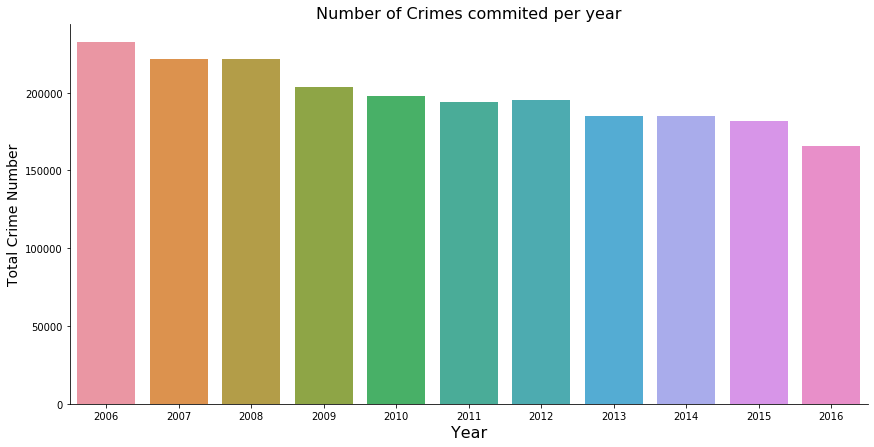

In [4]:
sb.catplot(x="Year", kind="count", height=6, aspect=2, data=df2)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Total Crime Number", fontsize=14)
plt.title("Number of Crimes commited per year", fontsize=16)

### Number of Crimes grouped by month
 
This graph groups cime rates by month.As it can be seen there is not a linear trend and crime tends to be more in the middle of the year and less in the begining and end.It goes without saying that this is also from 2006 to 2017.

Text(0.5, 1, 'Number of Crimes commited per Month')

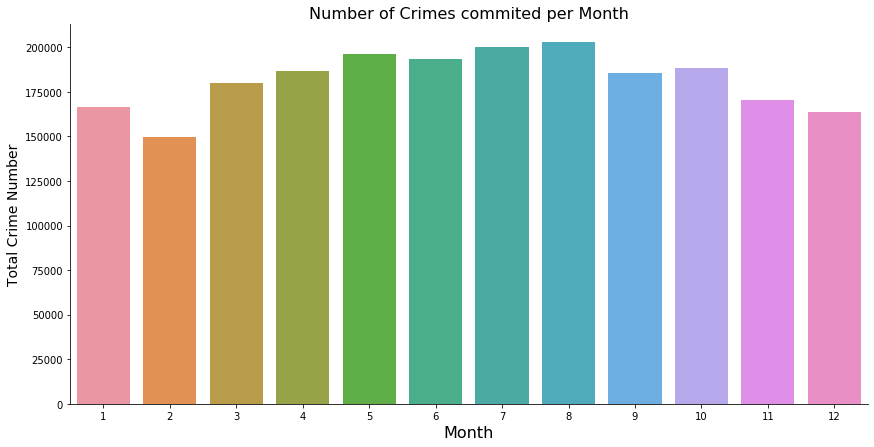

In [5]:
sb.catplot(x='Month', kind='count', height=6, aspect=2, data=df2)

plt.xlabel("Month", fontsize=16)
plt.ylabel("Total Crime Number", fontsize=14)
plt.title("Number of Crimes commited per Month", fontsize=16)

### Visualization of Crime types

The graph below shows frequency of crimes by the type of crime.It seems theft and assualt are very popular forms of crime.Arson,rapes,homicides and public alcohol consumption are the least common types.
This graph helps us understand how different forms of crime compare against each other in their frequency.
There is 33 different types of crime.


Text(0.5, 1, 'Number of Times a Specific type of Crime was Commited')

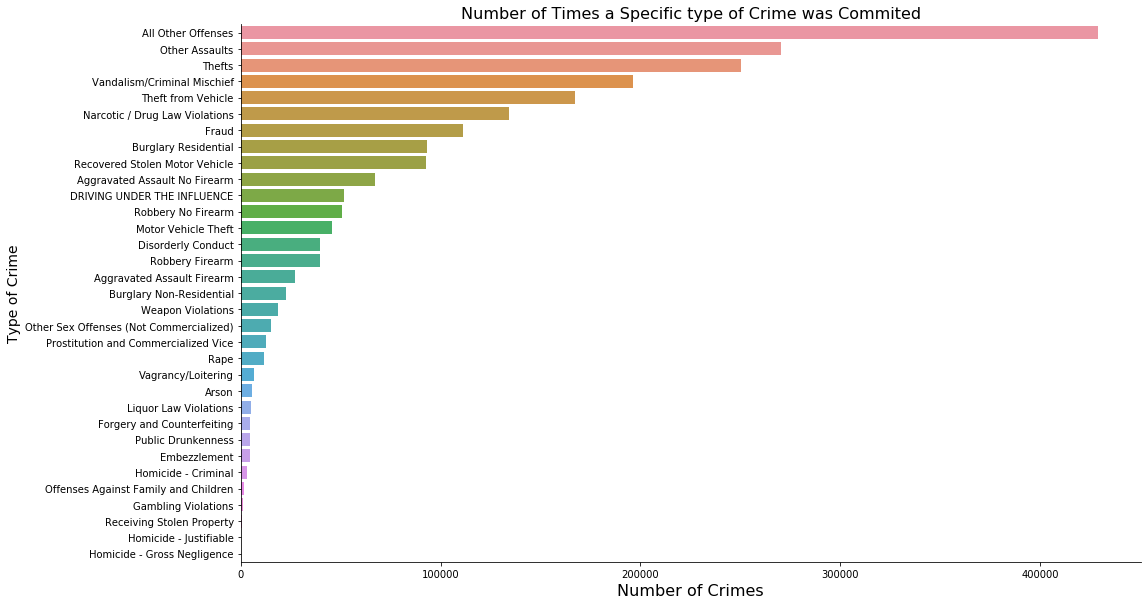

In [6]:
sb.catplot(y='Crime_Type', kind ='count', height=8, aspect=2, order=df2.Crime_Type.value_counts().index,
           data=df2)

plt.xlabel("Number of Crimes", fontsize=16)
plt.ylabel("Type of Crime", fontsize=14)
plt.title("Number of Times a Specific type of Crime was Commited", fontsize=16)

###  Police district & Crime


To dig deep we look into various police districts and how they are related to cime rates.
District 22 seems to be the least violent and district 11 seems to have the highest crime rates in various districts.

Text(0.5, 1, 'Number of Crimes commited per Police District')

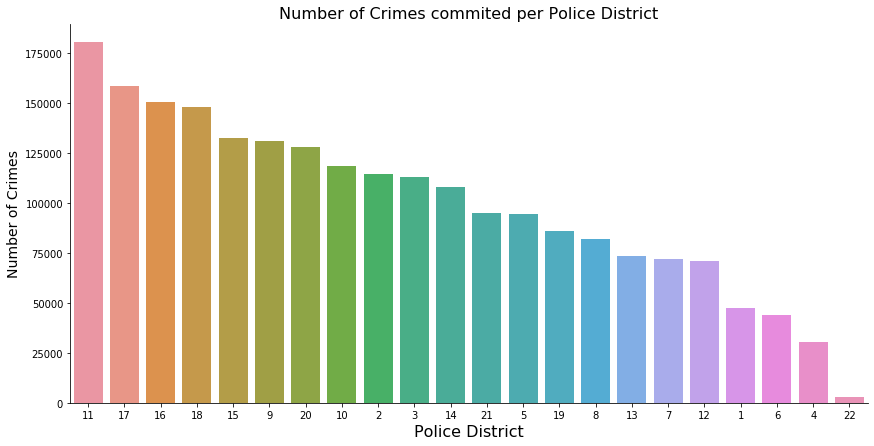

In [7]:
sb.catplot(x='Police_Districts', kind='count', height=6, aspect=2, order=df2.Police_Districts.value_counts().index, 
           data=df2)

plt.xlabel("Police District", fontsize=16)
plt.ylabel("Number of Crimes", fontsize=14)
plt.title("Number of Crimes commited per Police District", fontsize=16)

### Is it safe to keep your car unlocked during holidays in Philadephia ?
Can we predict anything about crime in Philadephia Based on the day?

We may also understand a few things about crime in Philly if we can relate it to various days and if this influences the crime.It seems that crime is lowest around Holidays. Each Holiday is marked on the graph and it can be seen that there is a sudden drop in crime rates around any holiday which is very surprising.

Text(305, 218, 'Christmas')

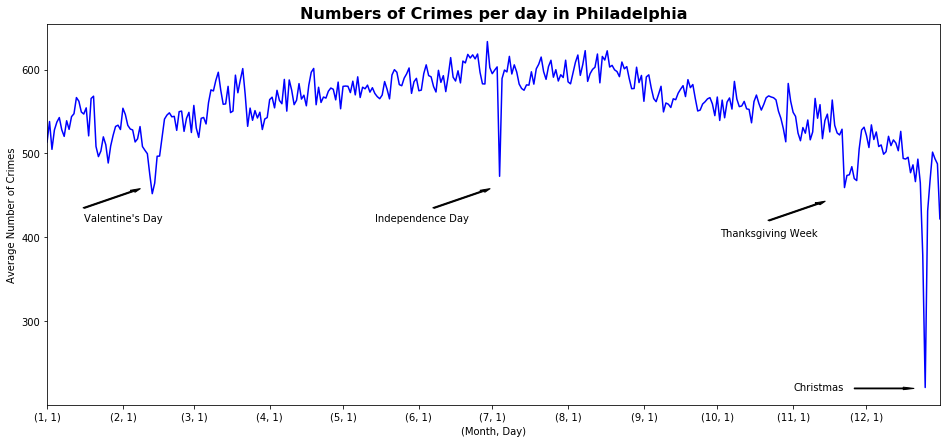

In [8]:
# Get average number of crime commited on each day of the Year for each 365 days
data_by_day_and_month = df.groupby(["Month", "Day"]).size() / 11

# Since only 3 leap year's have occured in the time period, divide it by 3 instead of 11.
data_by_day_and_month[2][29] = (data_by_day_and_month[2][29] * 11) / 3

# Make sure that the xticks in the following graph are always on the first of the month
leap_year = [31,29,31,30,31,30,31,31,30,31,30,31]
ticks = []
n = 0
for d in leap_year:
    ticks.append(n)
    n += d

plot = data_by_day_and_month.plot(figsize=(16,7), xticks=ticks, color="blue")
plot.set(xlabel="(Month, Day)", ylabel="Average Number of Crimes")
plot.set_title("Numbers of Crimes per day in Philadelphia", fontweight="bold", fontsize=16)

# Valentine's Day
plt.arrow(15,435,20,20, width=1, color="black", head_starts_at_zero=False)
plt.text(15,420, "Valentine's Day")

# Independence Day
plt.arrow(158,435,20,20, width=1, color="black", head_starts_at_zero=False)
plt.text(134,420, "Independence Day")

# Thanksgiving
plt.arrow(295,420,20,20, width=1, color="black", head_starts_at_zero=False)
plt.text(275,402, "Thanksgiving Week")

# Christmas
plt.arrow(330,220,20,0, width=1, color="black", head_starts_at_zero=False)
plt.text(305,218, "Christmas")


## Visualization using the Map of Philadelphia
This section uses the map of philadelphia to show the trends in Crime Data in Philadelphia for a better understanding of where in the city are most of the crimes concentrated. 

We have included three maps: 
1. This one shows all crimes in 2016, which helps see which regions are safe / unsafe.
2. This one shows heatmap of dangerous crimes from 2011 to 2016, which shows where most dangerous crimes are concentrated.
3. This one shows heatmap of thefts from 2015 to 2016, which shows where most thefts occur.

Note that the reason for using different years is mainly because folium maps don't fetch for a dataset larger than a certain number


### Map of all crimes in 2016


Below is a scatterplot of crimes that occured in 2016.The black color represents violent or dangerous crimes,blue stands for theft while cyan represents petty crimes.

This shows that the more dangerous the crime the less it is common (or Expected).

Our graph uses a sample size of 42,000 this is a good number as it does provide very robust sample without a bias.It is also not such a big number to slowen the process.We were very mindful of the bias effect that could happen with smaller numbers.

In [9]:
from folium.plugins import HeatMap
from folium import plugins
from folium import FeatureGroup
from folium import IFrame
from folium.plugins import MarkerCluster
from random import randint

dangerous = ['Weapon Violations', 'Robbery Firearm', 'Homicide - Criminal', 'Aggravated Assault Firearm', 
             'Homicide - Gross Negligence', 'Homicide - Justifiable', 'Rape']

theft = ['Thefts', 'Theft from Vehicle', 'Motor Vehicle Theft', 'Receiving Stolen Property', 
         'Recovered Stolen Motor Vehicle']

map_osm = folium.Map(location=[39.95,-75.16], zoom_start=11)
arrest_loc = FeatureGroup(name="Crime")

temp_data = df2.sample(n=42000)[df2.Year == 2016]

for i,row in temp_data.iterrows():
    if row['Crime_Type'] in dangerous:
        arrest_loc.add_child(folium.Circle(radius=30, location=[row['Latitude'],row['Longitude']],color='black',fill=True))
    elif row['Crime_Type'] in theft:
        arrest_loc.add_child(folium.Circle(radius=30, location=[row['Latitude'],row['Longitude']],color='blue',fill=True))
    else:
        arrest_loc.add_child(folium.Circle(radius=30, location=[row['Latitude'],row['Longitude']],color='cyan',fill=True))
    
map_osm.add_child(arrest_loc)
map_osm.add_child(folium.map.LayerControl())
map_osm

###  Violent crimes visualized.

This map is a Heatmap for time period betwen 2011 and 2016,it focuses on Violent crimes.Violent crimes are armed robberies,assualts,rape,and weapon violations.
This graph shows where dangerous crimes happen most often


The dataset is from 2011 to 2016 because a larger dataset would not load and it would have been too big.

In [10]:
map_osm2 = folium.Map(location=[39.95,-75.16], zoom_start=11)

# creating a new dataframe with all the dangerous crimes in it
dangerous_data = df2[df2['Crime_Type'].isin(dangerous)]

# Add data for heatmp 
data_heatmap = dangerous_data[dangerous_data.Year > 2010]
data_heatmap = data_heatmap[['Latitude','Longitude']]
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(map_osm2)

map_osm2



### Theft types of crimes visualized 2015 to 2016


Again the heatmap concept is used to dispaly theft.Theft is a broad category which includes:
* Vehicles 
* Receiving Stolen goods 
* Recovering stolen vehicles 
* Property theft 
This graph shows where thefts crimes happen most often


Since theft has been a common crime we could not load the same year span as violent crimes as the dataset was big.However the dataset for theft is still large enough to understand.

In [11]:
map_osm3 = folium.Map(location=[39.95,-75.16], zoom_start=11)

# creating a new dataframe with all the thefts crimes in it
theft_data = df2[df2['Crime_Type'].isin(theft)]

# Add data for heatmp 
data_heatmap = theft_data[theft_data.Year > 2014].sample(frac=0.7)
data_heatmap = data_heatmap[['Latitude','Longitude']]
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(map_osm3)

map_osm3

# Part - 3: Hypothesis Testing and ML

Regression by Year and crime count.


In [12]:
#Use groupby and count functions to count the number of crimes in each year
data_by_year = df2.copy().groupby(df2['Year'], as_index=True, group_keys=True).count()
#Put indexes into the result table
count_by_year = data_by_year[['UCR_General']].reset_index()
#Instead of UCR_General, Count should be the name of the column
count_by_year = count_by_year.rename(index=str, columns={'UCR_General' : 'Count'})
count_by_year


Year   Count
0   2006  232311
1   2007  221803
2   2008  221847
3   2009  203388
4   2010  197742
5   2011  193978
6   2012  195289
7   2013  185158
8   2014  184982
9   2015  182127
10  2016  165466

Text(0.5, 1.0, 'Crimes in Philadelphia')

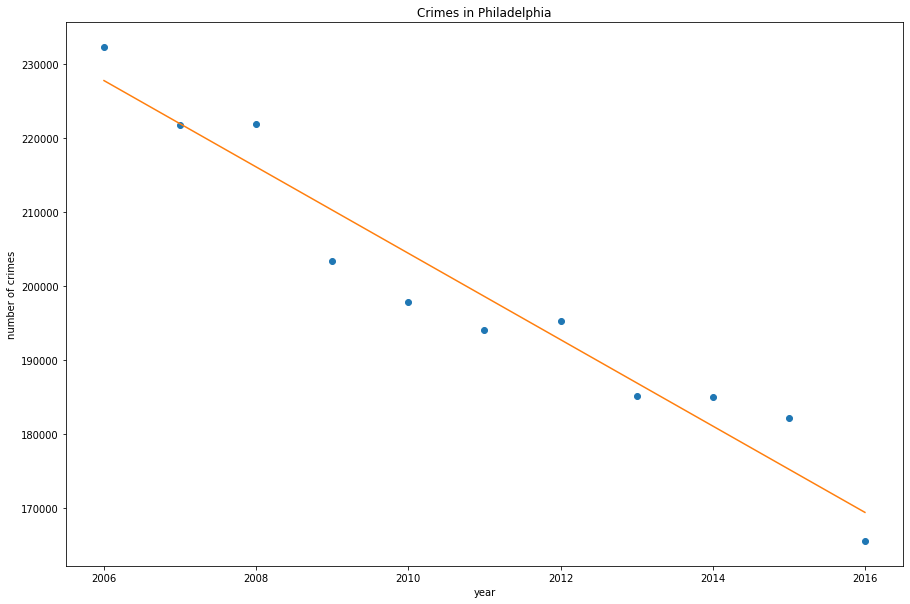

In [13]:
# regression line for the number of crimes per year.
table = count_by_year
x_d=table['Year'].values
y_d=table['Count'].values
z=np.polyfit(x=x_d,y=y_d,deg=1)
f=np.poly1d(z)
x_n = np.linspace(x_d.min(), x_d.max(), 100)
y_n = f(x_n)
plt.figure(figsize=(15,10))
plt.plot(x_d, y_d,'o',x_n,y_n)
    
plt.xlabel("year")
plt.ylabel("number of crimes")
plt.title("Crimes in Philadelphia")


In [14]:
#linear regression 1
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
count_year = count_by_year[['Year', 'Count']].sort_values(by=['Year'], ascending=True).reset_index(drop=True)
npMatrix = np.matrix(count_year)
x_value = npMatrix[:,0]
y_value = npMatrix[:,1]
line = LinearRegression().fit(x_value,y_value) 
m = line.coef_[0]
b_value = line.intercept_
print ("y = {0}x + {1}".format(m, b_value))
x_data = count_year['Year'].values
y_data = count_year ['Count'].values
minimum = x_data.min()
maximum = x_data.max()
result = sm.ols(formula="Count ~ Year", data=count_year).fit()
print (result.summary())

x1 = np.linspace(minimum, maximum, 100)
y1 = x1*m+b_value

y = [-5840.33636364]x + [11943470.15454546]
                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sun, 15 Dec 2019   Prob (F-statistic):           1.09e-06
Time:                        22:48:44   Log-Likelihood:                -108.87
No. Observations:                  11   AIC:                             221.7
Df Residuals:                       9   BIC:                             222.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

 ### Based on the regression line equation, on average, crime count decreases by -5840.33636364 every year.

### Now we add another factor to our regression, which is Crime type. 

In [15]:
data_by_type = df2.copy().groupby(df2['Crime_Type'], as_index=True, group_keys=True).count()
count_crime_type = data_by_type[['UCR_General']].reset_index()
count_crime_type = count_crime_type.rename(index=str, columns={'UCR_General' : 'Count'})
count_crime_type


Crime_Type   Count
0                Aggravated Assault Firearm   27208
1             Aggravated Assault No Firearm   67335
2                        All Other Offenses  428833
3                                     Arson    5543
4                  Burglary Non-Residential   22896
5                      Burglary Residential   93013
6               DRIVING UNDER THE INFLUENCE   51764
7                        Disorderly Conduct   39527
8                              Embezzlement    4546
9                Forgery and Counterfeiting    4760
10                                    Fraud  111027
11                      Gambling Violations     905
12                      Homicide - Criminal    3349
13              Homicide - Gross Negligence      12
14                   Homicide - Justifiable      40
15                    Liquor Law Violations    5363
16                      Motor Vehicle Theft   45587
17           Narcotic / Drug Law Violations  134460
18     Offenses Against Family and Children    1766
19                           Other Assaults  270525
20  Other Sex Offenses (Not Commercialized)   14989
21     Prostitution and Commercialized Vice   12640
22                       Public Drunkenness    4547
23                                     Rape   11551
24                Receiving Stolen Property     757
25           Recovered Stolen Motor Vehicle   92643
26                          Robbery Firearm   39428
27                       Robbery No Firearm   50455
28                       Theft from Vehicle  167027
29                                   Thefts  250111
30                       Vagrancy/Loitering    6726
31              Vandalism/Criminal Mischief  196318
32                        Weapon Violations   18440

In [17]:
# Linear regression 2
# Another regression based on Year and Crime Type
crime_type_year = df2.copy()

crime_type_year  = crime_type_year[['Year','Crime_Type']]
#Get the count associated with year and crime type
crime_type_year = crime_type_year.groupby(['Year','Crime_Type']).size()
crime_type_year = crime_type_year.reset_index()
#Rename count column
crime_type_year['Count'] = crime_type_year[0]
crime_type_year = crime_type_year.drop(0,1)
#Fit the second regression
regression2 = sm.ols(formula='Count ~ Year + Crime_Type + Year * Crime_Type', data=crime_type_year).fit()
regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     349.9
Date:                Sun, 15 Dec 2019   Prob (F-statistic):          1.12e-236
Time:                        22:49:40   Log-Likelihood:                -2903.9
No. Observations:                 349   AIC:                             5940.
Df Residuals:                     283   BIC:                             6194.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                   1.837e+05   2.12e+05      0.868      0.386   -2.33e+05       6e+05
Crime_Type[T.Aggravated Assault No Firearm]                 1.728e+05   2.99e+05      0.577      0.564   -4.16e+05    7.62e+05
Crime_Type[T.All Other Offenses]                            1.706e+06   2.99e+05      5.698      0.000    1.12e+06    2.29e+06
Crime_Type[T.Arson]                                        -1.295e+05   2.99e+05     -0.433      0.665   -7.19e+05     4.6e+05
Crime_Type[T.Burglary Non-Residential]                      7.455e+04   2.99e+05      0.249      0.803   -5.15e+05    6.64e+05
Crime_Type[T.Burglary Residential]                          3.656e+05   2.99e+05      1.221      0.223   -2.24e+05    9.55e+05
Crime_Type[T.DRIVING UNDER THE INFLUENCE]                   1.828e+05   2.99e+05      0.611      0.542   -4.06e+05    7.72e+05
Crime_Type[T.Disorderly Conduct]                            2.849e+05   2.99e+05      0.952      0.342   -3.04e+05    8.74e+05
Crime_Type[T.Embezzlement]                                 -1.541e+05   2.99e+05     -0.515      0.607   -7.43e+05    4.35e+05
Crime_Type[T.Forgery and Counterfeiting]                   -6.806e+04   2.99e+05     -0.227      0.820   -6.57e+05    5.21e+05
Crime_Type[T.Fraud]                                        -5.714e+05   2.99e+05     -1.909      0.057   -1.16e+06    1.77e+04
Crime_Type[T.Gambling Violations]                          -1.583e+05   2.99e+05     -0.529      0.597   -7.47e+05    4.31e+05
Crime_Type[T.Homicide - Criminal]                          -1.613e+05   2.99e+05     -0.539      0.590    -7.5e+05    4.28e+05
Crime_Type[T.Homicide - Gross Negligence]                   -1.84e+05   3.67e+05     -0.501      0.617   -9.06e+05    5.38e+05
Crime_Type[T.Homicide - Justifiable]                       -1.917e+05   3.14e+06     -0.061      0.951   -6.37e+06    5.99e+06
Crime_Type[T.Liquor Law Violations]                          -8.8e+04   2.99e+05     -0.294      0.769   -6.77e+05    5.01e+05
Crime_Type[T.Motor Vehicle Theft]                           8.886e+05   2.99e+05      2.969      0.003    2.99e+05    1.48e+06
Crime_Type[T.Narcotic / Drug Law Violations]                1.392e+06   2.99e+05      4.652      0.000    8.03e+05    1.98e+06
Crime_Type[T.Offenses Against Family and Children]          -1.69e+05   2.99e+05     -0.565      0.573   -7.58e+05     4.2e+05
Crime_Type[T.Other Assaults]                                4.702e+05   2.99e+05      1.571      0.117   -1.19e+05    1.06e+06
Crime_Type[T.Other Sex Offenses (Not Commercialized)]      -2.625e+04   2.99e+05     -0.088      0.930   -6.15e+05    5.63e+05
Crime_Type[T.Prostitution and Comme

### If we compare the regression results,the model that was based on year and crime type has a higher p-value and R-squared compared with the model with only year. So, we conclude that crime type contributes in a meaningful way to the predictive  ability of the regression equation.

# Conclusion
It is important to understand how trends in different types of crimes keep changing with time and which regions of the Philadelphia city are most affected by them. This tutorial is an example of how existing crime data can be used to understand these trends and make people more aware in order to keep the city safe. 

In our analysis we concluded that the overall number of crimes are decreasing by years in Philadelphia. But on the other hand, disparities exist in these numbers when considering different factors like months, days, neighborhoods and police districts. It is also evident that some types of crimes are much more frequent than other types of crimes. 

Further this tutorial can also be used for policy making and resource allocation based on the trends and disparities that were discovered in our analysis. For example, the police districts with highest crime rates should be given higher priority when framing policies related to crime reduction. Further it can also be used for predicting future trends using Machine Learning techniques.

## References
- Dataset: https://www.kaggle.com/mchirico/philadelphiacrimedata